**BRAIN TUMOR DATA SEGMENTATION USING SEGMENT ANYTHING MODEL(SAM)**

In [ ]:
#installing ultralytics framework
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.9 MB/s eta 0:00:00


In [ ]:
mkdir 'datset' #Making dataset directory to store dataset imported from roboflow

In [ ]:
import os
os.chdir('/content/datset') #Changing directory from root to dataset

In [ ]:
# Importing dataset from ROBOFLOW using API key
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tNcC80jQ8PGKKPz5yMpE")
project = rf.workspace("rodney").project("brain-tumor-g8qie")
version = project.version(17)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to brain-tumor-17 in yolov8:: 100%|██████████| 3652/3652 [00:00<00:00, 7177.07it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
#IMPORTANT_STEP
# NOW OPEN THE "data.yaml" file located at "/content/datset/brain-tumor-17/data.yaml" and give the paths of test,train and validation images
#Perform training after adjusting paths in data.yaml file

In [ ]:
#Training yolov11n-segmentation model on un-labelled data
from ultralytics import YOLO

model=YOLO("yolo11n.pt")

train_results=model.train(
    data='/content/datset/brain-tumor-17/data.yaml',
    epochs=20,
    imgsz=640,
    optimizer='AdamW'
)

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datset/brain-tumor-17/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots

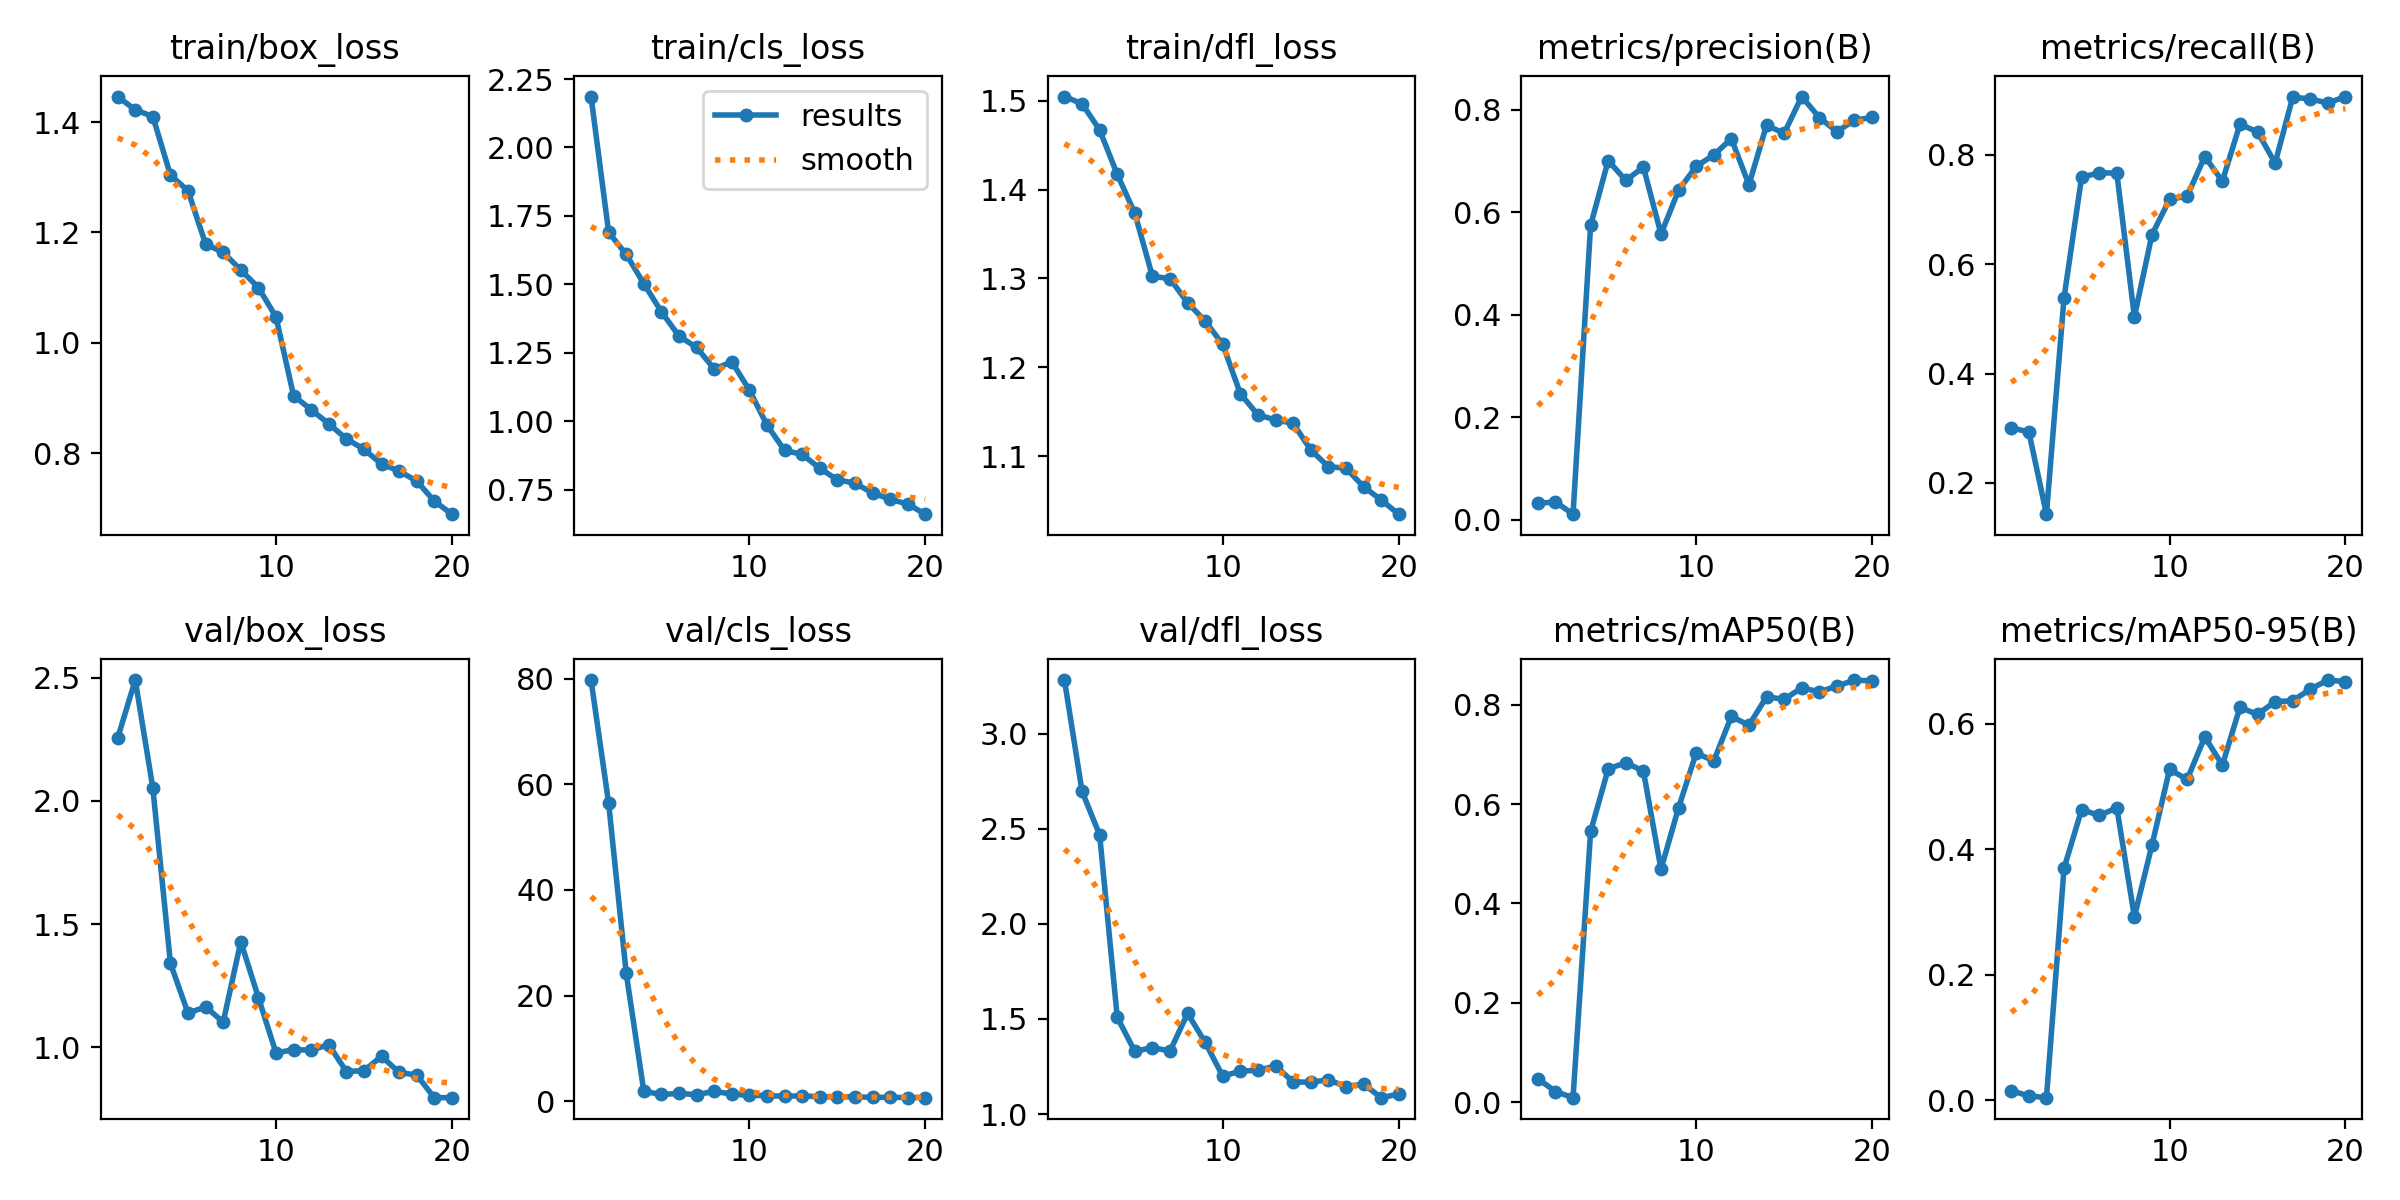

In [ ]:
#Displaying graphical reults from trained model
from IPython.display import Image
Image('/content/datset/runs/detect/train/results.png')


image 1/1 /content/datset/brain-tumor-17/test/images/y110_jpg.rf.534f579043873b4c3419ac50aebc35aa.jpg: 640x640 1 object, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/datset/runs/detect/predict2


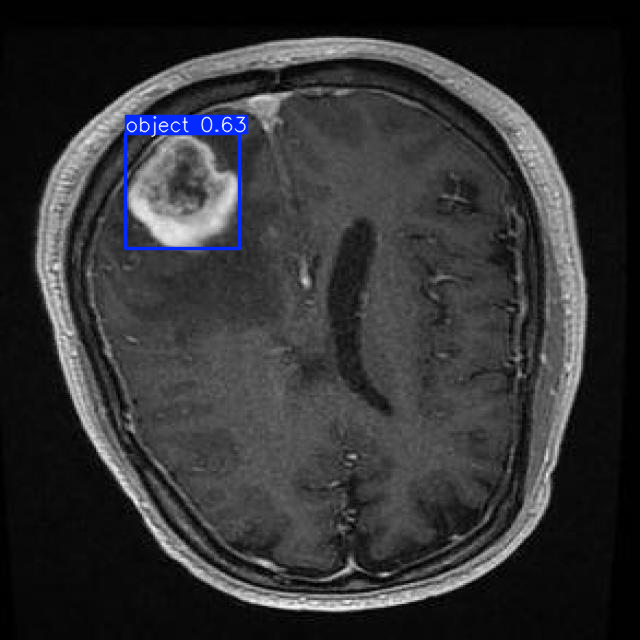

In [ ]:
#Taking prediction from trained model on an image from test data
from ultralytics import YOLO

model=YOLO('/content/datset/runs/detect/train/weights/best.pt')

results=model('/content/datset/brain-tumor-17/test/images/y110_jpg.rf.534f579043873b4c3419ac50aebc35aa.jpg', save=True)
results[0].show()

In [ ]:
#printing bounding boxes
for result in results:
  boxes= result.boxes
  print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.7087], device='cuda:0')
data: tensor([[134.1083, 199.9799, 291.3554, 345.8432,   0.7087,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[212.7319, 272.9116, 157.2472, 145.8633]], device='cuda:0')
xywhn: tensor([[0.3324, 0.4264, 0.2457, 0.2279]], device='cuda:0')
xyxy: tensor([[134.1083, 199.9799, 291.3554, 345.8432]], device='cuda:0')
xyxyn: tensor([[0.2095, 0.3125, 0.4552, 0.5404]], device='cuda:0')


In [ ]:
#Using SAM model to perform segmentation
from ultralytics import YOLO
from ultralytics import SAM


yolo_model=YOLO('/content/datset/runs/detect/train/weights/best.pt')

results=yolo_model('/content/datset/runs/detect/predict2/y110_jpg.rf.534f579043873b4c3419ac50aebc35aa.jpg')

sam_model=SAM('sam2_b.pt')

for result in results:
  class_ids=result.boxes.cls.int().tolist()
  if len(class_ids):
    boxes=result.boxes.xyxy
    sam_results=sam_model(result.orig_img, bboxes=boxes, verbose=False, save=True)


image 1/1 /content/datset/runs/detect/predict2/y110_jpg.rf.534f579043873b4c3419ac50aebc35aa.jpg: 640x640 1 object, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/datset/runs/segment/predict2


In [ ]:
#saving dataset file to drive
!cp -r /content/datset /content/drive/MyDrive